In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

In [3]:
IMAGE_SIZE = 200

In [4]:
img_dir = "E:\Bits_Final_Year_Project\Vehicle_Face_Mask_Detection\License_Dataset\images"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [5]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [6]:
path = 'E:/Bits_Final_Year_Project/Vehicle_Face_Mask_Detection/License_Dataset/annotations'
text_files = ['E:/Bits_Final_Year_Project/Vehicle_Face_Mask_Detection/License_Dataset/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [7]:
resizeannotation("E:/Bits_Final_Year_Project/Vehicle_Face_Mask_Detection/License_Dataset/annotations/Cars147.xml")

[168, 126, 90, 93]

In [8]:
y[0]

[167, 129, 90, 93]

In [9]:
np.array(X).shape

(433, 200, 200, 3)

In [10]:
np.array(y).shape

(433, 4)

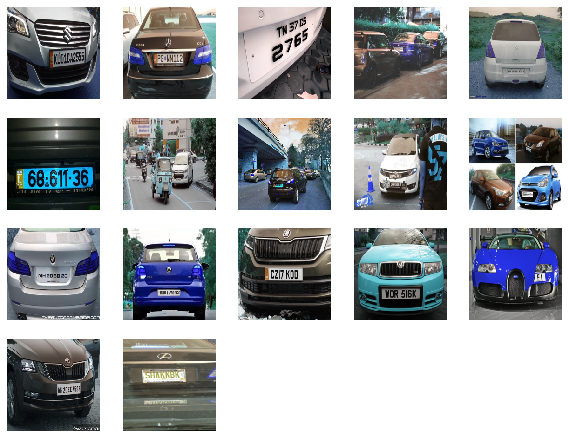

In [11]:
plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

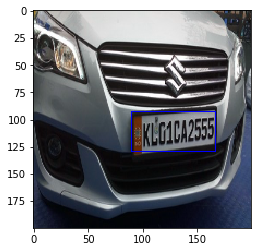

In [12]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

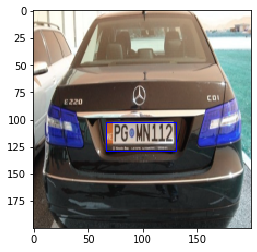

In [13]:
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

In [14]:
X=np.array(X)
y=np.array(y)

In [15]:
X = X / 255
y = y / 255

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [17]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16


model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [19]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
11/11 [==============================] - 141s 13s/step - loss: 0.0404 - accuracy: 0.4451 - val_loss: 0.0173 - val_accuracy: 0.6437
Epoch 2/20
11/11 [==============================] - 126s 11s/step - loss: 0.0150 - accuracy: 0.6705 - val_loss: 0.0137 - val_accuracy: 0.5287
Epoch 3/20
11/11 [==============================] - 140s 13s/step - loss: 0.0081 - accuracy: 0.6214 - val_loss: 0.0091 - val_accuracy: 0.6437
Epoch 4/20
11/11 [==============================] - 120s 11s/step - loss: 0.0050 - accuracy: 0.7688 - val_loss: 0.0078 - val_accuracy: 0.7241
Epoch 5/20
11/11 [==============================] - 140s 13s/step - loss: 0.0027 - accuracy: 0.8410 - val_loss: 0.0065 - val_accuracy: 0.7586
Epoch 6/20
11/11 [==============================] - 123s 11s/step - loss: 0.0014 - accuracy: 0.8584 - val_loss: 0.0066 - val_accuracy: 0.8161
Epoch 7/20
11/11 [==============================] - 132s 12s/step - loss: 9.3023e-04 - accuracy: 0.8815 - val_loss: 0.0067 - val_accuracy: 0.8276
Ep

In [20]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 79.31%


In [21]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

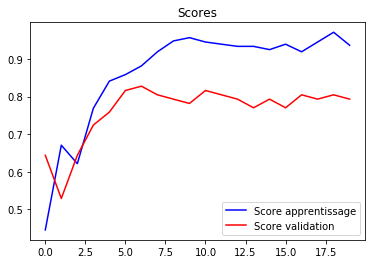

In [22]:
plot_scores(train)

In [23]:
y_cnn = model.predict(X_test)

In [24]:
y_cnn.shape

(87, 4)

In [26]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [67]:
import os
path="License_Dataset/Car_Images/"
lst_add=[]
for filename in os.listdir(path):
    my_source =path + filename
    lst_add.append(my_source)
lst_add

['License_Dataset/Car_Images/Cars0.jpg',
 'License_Dataset/Car_Images/Cars1.jpg',
 'License_Dataset/Car_Images/Cars10.jpg',
 'License_Dataset/Car_Images/Cars100.jpg',
 'License_Dataset/Car_Images/Cars1000.jpg',
 'License_Dataset/Car_Images/Cars1001.jpg',
 'License_Dataset/Car_Images/Cars1002.jpg',
 'License_Dataset/Car_Images/Cars1003.jpg',
 'License_Dataset/Car_Images/Cars1004.jpg',
 'License_Dataset/Car_Images/Cars1005.jpg',
 'License_Dataset/Car_Images/Cars1006.jpg',
 'License_Dataset/Car_Images/Cars1007.jpg',
 'License_Dataset/Car_Images/Cars1008.jpg',
 'License_Dataset/Car_Images/Cars1009.jpg',
 'License_Dataset/Car_Images/Cars101.jpg',
 'License_Dataset/Car_Images/Cars1010.jpg',
 'License_Dataset/Car_Images/Cars1011.jpg',
 'License_Dataset/Car_Images/Cars1012.jpg',
 'License_Dataset/Car_Images/Cars1013.jpg',
 'License_Dataset/Car_Images/Cars1014.jpg',
 'License_Dataset/Car_Images/Cars1015.jpg',
 'License_Dataset/Car_Images/Cars1016.jpg',
 'License_Dataset/Car_Images/Cars1017.jpg'

In [220]:
import cv2
import imutils
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


for i in lst_add[1562:1572]:
    print(i)
    img = cv2.imread(i,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (600,400) )
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    gray = cv2.bilateralFilter(gray, 13, 15, 15) 
    
    edged = cv2.Canny(gray, 30, 200) 
    contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    
    screenCnt = None
    
    for c in contours:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
        if len(approx) == 4:
            screenCnt = approx
            break

    if screenCnt is None:
        detected = 0
        print ("No contour detected")
    else:
         detected = 1

    if detected == 1:
        cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(img,img,mask=mask)

    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = gray[topx:bottomx+1, topy:bottomy+1]

    text = pytesseract.image_to_string(Cropped, config='--psm 11')
    print("Detected license plate Number is:",text)
    img = cv2.resize(img,(500,300))
    Cropped = cv2.resize(Cropped,(400,200))
    cv2.imshow('car',img)
    cv2.imshow('Cropped',Cropped)

    cv2.waitKey(1)
    cv2.destroyAllWindows()

License_Dataset/Car_Images/Cars992.jpg
Detected license plate Number is: “ALOTBRBOS5

License_Dataset/Car_Images/Cars993.jpg
Detected license plate Number is: << ——<‘i—ts—

KLG10A2555

License_Dataset/Car_Images/Cars994.jpg
Detected license plate Number is: MH 2OBN 3525,

License_Dataset/Car_Images/Cars995.jpg
Detected license plate Number is: MH 20 EE 0943

License_Dataset/Car_Images/Cars996.jpg
Detected license plate Number is: Ne  GQG LS

License_Dataset/Car_Images/Cars997.jpg
Detected license plate Number is: —  } }—

KL 1267531

License_Dataset/Car_Images/Cars998.jpg
Detected license plate Number is: KL 7 BZ 99

License_Dataset/Car_Images/Cars999.jpg
Detected license plate Number is: L54 H 369



In [63]:
import cv2
import imutils
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

img = cv2.imread('License_Dataset/Car_Images/Cars55.jpg',cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400) )

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15) 

edged = cv2.Canny(gray, 30, 200) 
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("programming_fever's License Plate Recognition\n")
print("Detected license plate Number is:",text)
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
cv2.imshow('car',img)
cv2.imshow('Cropped',Cropped)

cv2.waitKey(1)
cv2.destroyAllWindows()

programming_fever's License Plate Recognition

Detected license plate Number is: DL8Cx 4850

